In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

df = pd.read_csv("C:/Users/Daniel Lara/Downloads/2008.csv")
df.dropna(inplace = True, subset=["ArrDelay","DepDelay","Distance","AirTime"])

sns.set(rc={"figure.figsize":(15,10)})

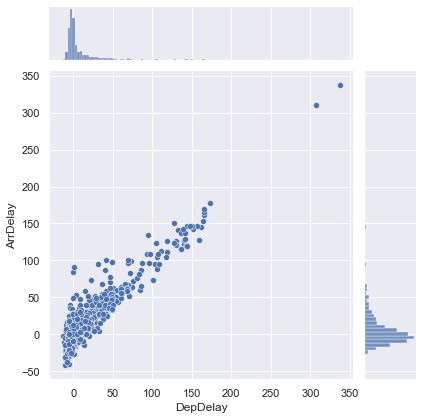

In [25]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)

sns.jointplot(x = df2["DepDelay"], y = df2["ArrDelay"])

In [26]:
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["DepDelay"])<40]

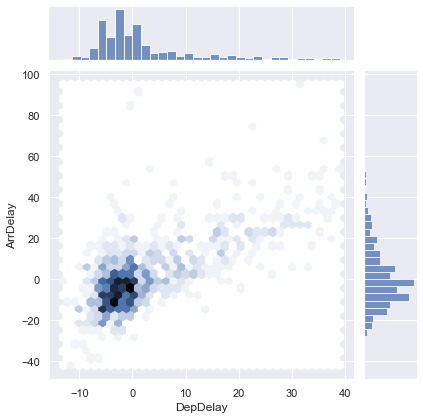

In [27]:
# deja visualizar mejor en donde estan los datos agurpados ('scatter', 'hist', 'hex', 'kde', 'reg', 'resid')
sns.jointplot(x = df3["DepDelay"], y = df3["ArrDelay"], kind = "hex")

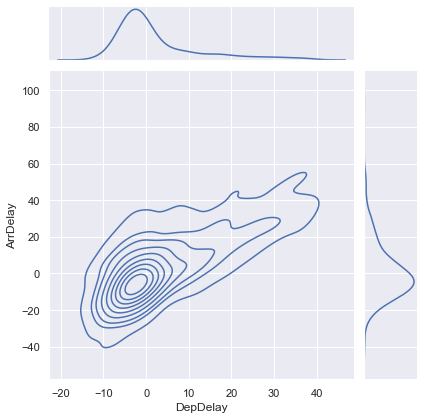

In [28]:
sns.jointplot(x = df3["DepDelay"], y = df3["ArrDelay"], kind = "kde")

In [29]:
gb_df = pd.DataFrame(df2.groupby(["Origin","Month"], as_index=False)["DepDelay"].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,8.426230
1,ATL,2,17.672131
2,ATL,3,18.277778
3,ATL,4,13.323944
4,ATL,5,5.298507


In [30]:
data = gb_df.pivot("Month","Origin","DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,8.426230,14.818182,6.615385
2,17.672131,10.222222,1.000000
3,18.277778,22.777778,-5.800000
4,13.323944,6.666667,20.714286
5,5.298507,6.800000,-4.111111
6,13.186667,16.916667,11.818182
7,19.571429,5.090909,7.307692
8,11.307692,41.285714,3.900000
9,4.400000,-2.333333,-2.333333


<AxesSubplot:xlabel='Origin', ylabel='Month'>

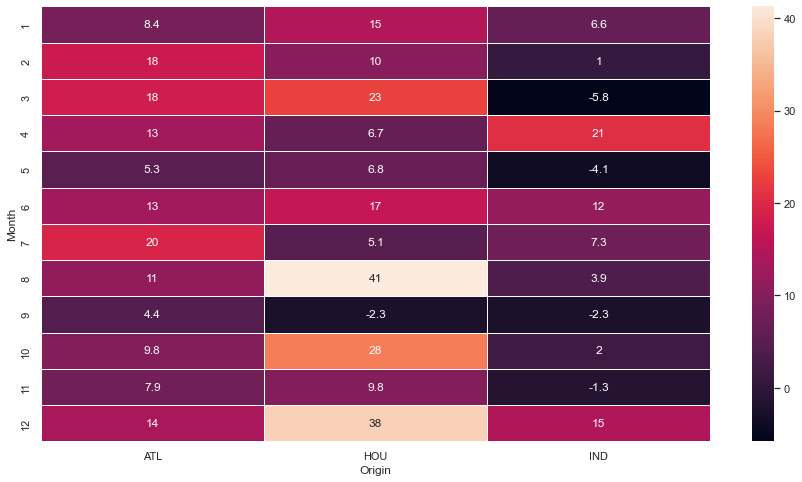

In [31]:
# Permite ver en que mes y que aeropuerto los retrasos son mas elevados
sns.set(rc={"figure.figsize":(15,8)})
sns.heatmap(data = data, annot=True, linewidths=.5)

In [51]:
gb_df = pd.DataFrame(df2.groupby(["Month","DayOfWeek"], as_index=False)["DepDelay"].mean())
gb_df.head()

,Month,DayOfWeek,DepDelay
0,1,1,2.875000
1,1,2,7.307692
2,1,3,43.000000
3,1,4,4.176471
4,1,5,6.583333


In [52]:
data = gb_df.pivot("Month","DayOfWeek","DepDelay")
data

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,2.875000,7.307692,43.000000,4.176471,6.583333,8.500000,11.727273
2,21.928571,3.230769,12.307692,6.800000,9.733333,30.666667,25.000000
3,18.333333,21.300000,21.285714,1.466667,13.615385,26.500000,22.666667
4,-1.727273,7.444444,6.583333,1.083333,67.222222,9.500000,22.666667
5,12.642857,4.842105,7.727273,-0.400000,2.357143,3.285714,-1.818182
6,7.380952,14.000000,7.083333,9.384615,18.562500,37.875000,12.222222
7,21.850000,16.304348,0.571429,30.571429,26.583333,0.200000,17.153846
8,0.600000,10.904762,-0.500000,5.600000,28.090909,28.500000,11.818182
9,-1.181818,1.000000,-1.636364,-4.500000,25.428571,0.500000,9.285714


<AxesSubplot:xlabel='DayOfWeek', ylabel='Month'>

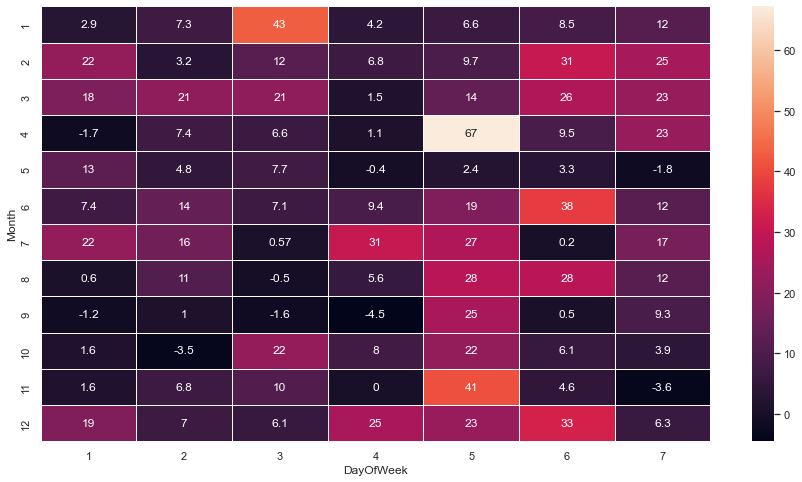

In [53]:
# Permite ver en que mes y que aeropuerto los retrasos son mas elevados
sns.set(rc={"figure.figsize":(15,8)})
sns.heatmap(data = data, annot=True, linewidths=.5)